<div class="cite2c-biblio"></div><img src="escudo_utfsm.gif" style="float:right;height:100px">
<img src="IsotipoDIisocolor.png" style="float:left;height:100px">


<center>
    <h1> INF-393 - Machine Learning</h1>
    <h1> Tarea 2 - Métodos para Clasificación </h1>

<p>
<br><center>_Javier Reyes_<strong> - </strong>_javier.reyes.12@sansano.usm.cl_<strong> - </strong>_201273524-6_ </center>
<br><center>_Marco Salinas_<strong> - </strong>_marco.salinas.12@sansano.usm.cl_<strong> - </strong>_201273589-0_ </center>
</p>
</center>

#  1 Tipos de Fronteras en Clasificación


In [2]:
%matplotlib inline
import numpy as np
from sklearn.utils import check_random_state

n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

<p  style="text-align: justify;"> 
    **(a)** Construya el conjunto de datos (dataset) común con los dos conjuntos generados. Luego se realiza un
shift desde el conjunto 2 al 1, esto se puede ver en la imagen anterior, donde el conjunto de color
naranjo (media luna) tiene puntos azules a la derecha pertenecientes al otro conjunto, esto es con
el mismo propósito de trabajar con un dataset no ideal. Determine cuántos registros contiene cada
conjunto y visualícelos.
</p>

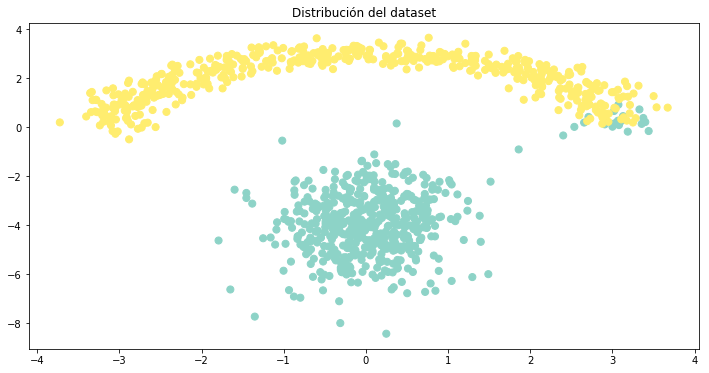

El primer conjunto tiene 520 datos 
El segundo conjunto tiene 480 datos


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X = np.concatenate((datos1, datos2), axis=0)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n) #media luna
y = np.concatenate((y1,y2),axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

def plot(x,y):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.Set3)
    plt.title("Distribución del dataset")
    plt.show()
    
plot(X,y)
    
print("El primer conjunto tiene " + str(len(y1))
     + " datos \nEl segundo conjunto tiene " + str(len(y2)) + " datos")

<p  style="text-align: justify;"> 
    **(b)** Entrene el clasificador Linear Discriminant Analysis (LDA) y visualice la frontera de decisión que
define este algoritmo. Analice cualitativamente lo que observa.
</p>

In [4]:
import math
import matplotlib.mlab as mlab
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(10,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.Set3)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.cool)
    plt.title(title)
    plt.show()
    

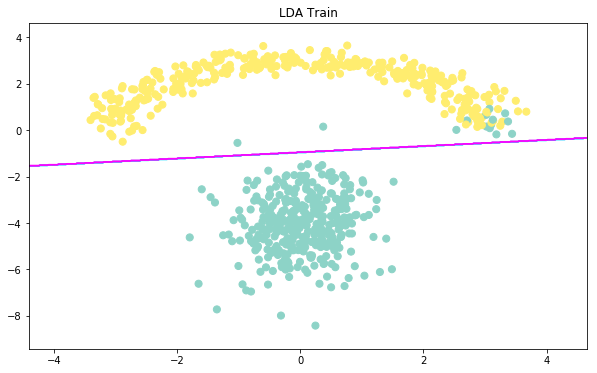

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_LDA = LDA()
model_LDA.fit(X_train,y_train)
visualize_border(model_LDA,X_train,y_train,"LDA Train")

<p  style="text-align: justify;"> 
    Se puede observar que el conjuto de datos 1 esta separado de una manera uniforme, pero en uno de sus extremos se mezclan con los datos del conjunto 2, haciendo imposible una separación para discriminar los datos con el algoritmo de LDA (a través de una recta). La única manera de poder utilizar el clasificador, es eliminando los outlayers, aunque esto es muy riesgoso porque pueden ser información valiosa.
</p>
    
<p  style="text-align: justify;"> 
    **(c)** Entrene el clasificador Quadratic Discriminant Analysis (QDA) y visualice la frontera de decisión que define este algoritmo. Analice cualitativamente lo que observa y compare con LDA, en qué difieren y en qué se asemejan ¿Qué distribución de probabilidad asumen cada uno?
    
</p>

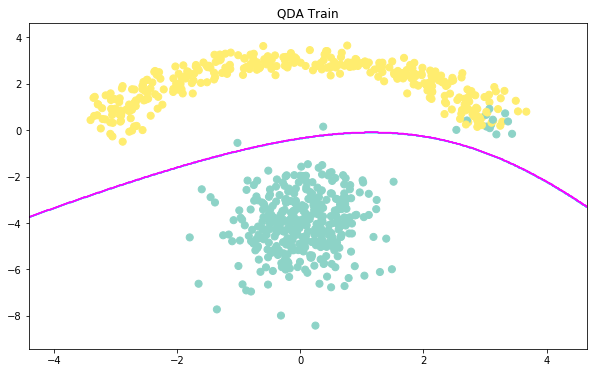

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import math as ma
model_QDA = QDA()
model_QDA.fit(X_train,y_train)
visualize_border(model_QDA,X_train,y_train,"QDA Train")

<p  style="text-align: justify;"> 
    Al igual que en el caso de LDA, la separación entre ambos conjuntos es imposible, pero en este caso, QDA logra delimitar de mejor manera los conjutos integrando más datos al conjunto de datos azules. 
</p>

<p  style="text-align: justify;">
    <ul>
        <li>Semejanzas
            <ul>
                <li>Ambos métodos de clasificación no pueden separar en un 100% el conjunto de datos.</li>
                <li>Aunque el tipo de separación es distinta, la cantidad de puntos que separan es prácticamente la misma.</li>
            </ul>
        </li>
        <li>Diferencias
            <ul>
                <li>El tipo de separación para clasificar los datos es distinta: LDA - línea recta; QDA - parábola.</li>
                <li>QDA prioriza la separación en donde está más centrado un tipo de datos, mientras que LDA tiende a separar a la "mitad" el dataset.</li>
            </ul>
        </li>
    </ul>
</p>
<p  style="text-align: justify;">
    Tanto LDA como QDA asumen una distribución de probabilidad normal o Gaussiana.
</p>

<p  style="text-align: justify;"> 
    **(d)** Compare cuantitativamente los clasificadores LDA y QDA en este dataset sintético mediante la métrica
de error de clasificación.

</p>

In [7]:
from sklearn.metrics import accuracy_score

y_pred_qda_train= model_QDA.predict(X_train)
y_pred_lda_train = model_LDA.predict(X_train)
y_pred_qda_test = model_QDA.predict(X_test)
y_pred_lda_test = model_LDA.predict(X_test)
print("Miss Classification Loss for LDA Train: %f"%(1-accuracy_score(y_train, y_pred_lda_train)))
print("Miss Classification Loss for QDA Train: %f"%(1-accuracy_score(y_train, y_pred_qda_train)))
print("Miss Classification Loss for LDA Test: %f"%(1-accuracy_score(y_test, y_pred_lda_test)))
print("Miss Classification Loss for QDA Test: %f"%(1-accuracy_score(y_test, y_pred_qda_test)))

Miss Classification Loss for LDA Train: 0.020000
Miss Classification Loss for QDA Train: 0.020000
Miss Classification Loss for LDA Test: 0.026667
Miss Classification Loss for QDA Test: 0.026667


<p  style="text-align: justify;"> 
    **(e)** Construya una función que entrene/ajuste un modelo de Regresión Logística Regularizado (utilizando
como penalizador la norma $l_2$), experimente con distintos valores del parámetro de regularización
mediante el gráfico interactivo. Explique el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.

</p>

In [10]:
import ipywidgets as widgets
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X_train,y_train)

from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR(C=param,penalty='l2')
    model.fit(X_train,y_train)
    return model

p_min = 0.01
p_max = 1
widgets.interact(visualize_border_interactive,param=(p_min,p_max, 0.01))

A Jupyter Widget

<function __main__.visualize_border_interactive>

<p  style="text-align: justify;"> 
Al aplicar la penalización con la norma $l_2$, lo que hace la $Logistic Regression$ es ir penalizando los datos con la regla de $Lasso$, es decir, que a mayor $\lambda$ mayor es la penalización. Es por esto que al aumentar la penalización, los límites de separación se irán ajustando de manera que quede lo más equilibrado posible, aunque esto implique "pasarse" un poco de la pendiente normal que tenía la recta al utilizar LDA.
<br>
Como se puede observar, en $p_{min}$ se obtiene la separación con LDA y mientras aumenta el valor de la penalización hasta llegar al valor $p_{max}$ se tendrá la "mejor" separación o la más equitativa entre los datos. Notar que llegando al valor $p = 0.6$ luego si se sigue aumentando el valor de $p$, la pendiente de la recta no aumentará, por lo que se llegá a la mejor separación entre los límites de los conjuntos.
</p>

<p  style="text-align: justify;"> 
    **(f)** Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) Lineal. Mediante
la imagen interactiva explore diferentes valores del parámetro de regularización C. Discuta el significado
y efecto esperado de este parámetro. Analice cualitativamente lo observado.

</p>

In [16]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X_train,y_train)
    return model

#use interactive
p_min = 1
p_max = 10
widgets.interact(visualize_border_interactive,param=(p_min,p_max, 1))

A Jupyter Widget

<function __main__.visualize_border_interactive>

<p  style="text-align: justify;"> 
Las $SMV$ se caracterizan por maximizar la mínima distancia de un punto de un conjuto al hiperplano, por lo que en este caso, se tendrá que aplicar el parámetro $C$ para poder clasificar de una mejor manera los datos. La función que cumple el parámetro $C$ es similar a la norma $l_2$ en $Logistic Regression$, ya que este se encarga de decirle a la $SVM$ cuántos datos mal clasificados quieres evitar. Si se tiene un $C$ pequeño, se tendrá un mayor margen de la separación al hiperplano incluso si hay elementos mal clasificados, en cambio con un $C$ grande, la $SVM$ buscará el margen al hiperplano más pequeño.
</p>

<p  style="text-align: justify;"> 
    **(g)** Construya una función que entrene/ajuste una Máquina de Vectores de Soporte (SVM) no Lineal.
Mediante la imagen interactiva explore diferentes valores del parámetro de regularización C y con
diferentes kernels. Discuta el significado y efecto esperado de este parámetro. Analice cualitativamente
lo observado.
</p>

In [12]:
def visualize_border_interactive(param, kernel):
    model = train_model(param, kernel)
    visualize_border(model,X_train,y_train)
    #visualize_border(model,X_test,y_test)

def train_model(param, kernel):
    model= SVM()
    model.set_params(C=param,kernel=kernel)
    model.fit(X_train,y_train)
    return model

#use interactive
p_min = 1
p_max = 100
widgets.interact(visualize_border_interactive,param=(p_min,p_max, 1), kernel = ['rbf','poly','linear'])

A Jupyter Widget

<function __main__.visualize_border_interactive>

<p  style="text-align: justify;">
    <ul>
        <li>C - RBF: Para el kernel <i>Radial Basic Function</i>, lo que hace $C$ es disminuir el "radio" que encierra al conjunto de datos amarillo. $C$ actúa de la misma manera anteriormente descrita, por lo que a un mayor $C$, el "radio" será menor.
        </li>
        <li>C - Poly: Para el kernel <i>Polinomial</i>, lo que hace $C$ es ir ajustando el polinomio a la separación óptima de los conjuntos de datos
        </li>
        <li>C - Linear: Es una $SVM$ normal, se discutió en la pregunta anterior.
        </li>
    </ul>
</p>

<p  style="text-align: justify;"> 
    **(h)** Construya un Arbol de Decisión de múltiples niveles para la clasificación del problema. Puede utilizar el criterio y la función de partición que prefiera. Mediante la imagen interactiva explore diferentes
valores del parámetro de máxima profunidad del árbol. Discuta el significado y efecto esperado de este
parámetro. Analice cualitativamente lo observado.
</p>

In [13]:
from sklearn.tree import DecisionTreeClassifier as Tree
def visualize_border_interactive(param,criterion):
    model = train_model(param,criterion)
    visualize_border(model,X_train,y_train)
    #visualize_border(model,X_test,y_test)

def train_model(param,criterion):
    model = Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='entropy',splitter='best')
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print ("Train Accuracy is : {0:.1f}%".format(accuracy_score(y_train,y_pred_train)*100))
    print ("Test Accuracy is : {0:.1f}%".format(accuracy_score(y_test,y_pred_test)*100))
    return model

#use interactive
p_min = 1
p_max = 20
widgets.interact(visualize_border_interactive,param=(p_min,p_max, 1),criterion = ['gini','entropy','variance'])

A Jupyter Widget

<function __main__.visualize_border_interactive>

<p  style="text-align: justify;"> 
    En este caso, los 3 criterios $gini$,$entropy$ y $variance$ se comportan de la misma manera en el Árbol de decisión. Lo que permite una mayor profundización en el árbol, es tener tantas separaciones de tal manera de obtener un conjunto de datos dentro de un espacio $A$ y otro en el espacio $B$, es decir, encacillar los conjuntos de datos.
    <br>
    Para este caso, el valor máximo de profundidad es $h_{max} = 11$ en donde se obtiene un 100% de acierto al separar el conjunto de datos amarillos del azul. Al seguir aumentando la cantidad de profundidad, lo único que se logra es separar los datos de otra manera.
</p>

<p  style="text-align: justify;"> 
    **(i)** Construya un algoritmo $k-NN$ para la clasificación del problema. Mediante la imagen interactiva explore
diferentes valores del parámetro $k$. Discuta el significado y efecto esperado de este parámetro. Analice
cualitativamente lo observado.

</p>

In [14]:
from sklearn.neighbors import KNeighborsClassifier
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X_train,y_train)
    #visualize_border(model,X_test,y_test)

def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print ("Train Accuracy is : {0:.1f}%".format(accuracy_score(y_train,y_pred_train)*100))
    print ("Test Accuracy is : {0:.1f}%".format(accuracy_score(y_test,y_pred_test)*100))

    return model


k_min = 1
k_max = 20
widgets.interact(visualize_border_interactive,param=(k_min,k_max))

A Jupyter Widget

<function __main__.visualize_border_interactive>

<p  style="text-align: justify;"> 
La fase de entrenamiento del algoritmo consiste en almacenar los vectores característicos y las etiquetas de las clases de los ejemplos de entrenamiento. En la fase de clasificación, la evaluación del ejemplo (del que no se conoce su clase) es representada por un vector en el espacio característico. Se calcula la distancia entre los vectores almacenados y el nuevo vector, y se seleccionan los $k$ ejemplos más cercanos. El nuevo ejemplo es clasificado con la clase que más se repite en los vectores seleccionados, es por esto que al aumentar la cantidad de vecinos $k$, el ruido o sesgo de los datos debería disminuir, aunque depende netamente de los datos.
<br>
EL algoritmo $k-NN$ actúa localmente buscando los vecinos más cercanos, los cuales se espera nos den la mejor clasificación. Para este caso, basta tomar $k = 1$ para obtener una separación perfecta entre los conjuntos de datos, ya que a medida de que se aumenta el número de vecino $k$, el porcentaje de acierto de clasificación llega como máximo al $98.5\%$. Notar que cuando los vecinos son impares, el porcentaje de acierto es más alto. 
</p>

# 2 Análisis de audios como datos brutos

<p  style="text-align: justify;"> 
    En esta parte de la experencia se trabajará con datos de audios los cuales son directamente extraídos desde datos fuentes _.wav_, lo que corresponde a una señal de sonido en diferentes tiempos. El _dataset_ se denomina _ Heartbeat Sounds_, el cual consta de grabaciones de sonidos de latidos cardíacos normales y anormales, con distintas categorías para los latidos anormales. Los datos fueron obtenidos desde un publico general a través de la aplicación de iPhone iStethoscope Pro.

</p>

In [12]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name

SAMPLE_RATE = 44100

def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

<p  style="text-align: justify;"> 
    **(a)** Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase.

</p>

In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')

<p  style="text-align: justify;">
    El _dataset_ posee 176 datos, los cuales poseen 4 columnas cada uno.
    <ul style="list-style-type:disc;margin-left:24px">
        <li>**dataset:** columna que indica a que dataset corresponde el dato</li>
        <li>**fname:** corresponde al nombre del archivo de audio</li>
        <li>**label:** puede ser "normal", estar en blanco (para datos sin etiqueta), y anormales donde pueden ser "artifac", "extrahls" y "murmur". </li>
        <li>**sublabel:** columna sin datos.</li>

    </ul>

</p>

<p  style="text-align: justify;">
    Descripcion de las categorias:
    <ul style="list-style-type:disc;margin-left:24px;text-align: justify;">
        <li>**Normal:** Corresponden a sonidos de corazones normales y saludables.</li>
        <li>**Murmur (Soplo):** Corresponden a soplos cardíacos, que suenan como si hubiera un ruido de "silbido, rugido, estruendo o fluido turbulento". </li>
        <li>**Extra Heart Sound:** Correspoden a una medición en la cual se escucha un sonido adicional del corazón.  </li>
        <li>**Artifact:** En esta categoria se encuentra una amplia gama de sonidos diferentes, que incluyen chillidos y ecos de realimentación, voz, música y ruido. Gerenalmente no hay sonidos cardíacos discernibles. Esta categoría es la más diferente de las otras. </li>
        <li>**Unlabelled:** Son aquellas muestras que no estan etiquetadas en ninguna categoria. </li>
    </ul>
</p>

|     Categoria     	| Registro 	|
|:-----------------:	|:--------:	|
|       Normal      	|    31    	|
|       Murmur      	|    34    	|
| Extra Heart Sound 	|    19    	|
|      Artifact     	|    40    	|
|     Unlabelled    	|    52    	|

In [14]:
df.drop(['dataset','sublabel',],axis=1,inplace=True)

In [15]:
print("Artifact",df.label.value_counts()['artifact'])
print("Murmur", df.label.value_counts()['murmur'])
print("Extra Heart Sound", df.label.value_counts()['extrahls'])
print("Normal", df.label.value_counts()['normal'])
print("Unlabelled", 176-40-34-19-31)

Artifact 40
Murmur 34
Extra Heart Sound 19
Normal 31
Unlabelled 52


<p  style="text-align: justify;"> 
    **(b)** Lea los archivos _.wav_ y transformelos en secuencias de tiempo. Realice un _padding_ de ceros al final de
cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la
importancia de realizar este paso.

</p>

In [16]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux


new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series'] = new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))

<p  style="text-align: justify;"> 
    La importancia de realizar este paso, es normalizar la dimensionalidad de cada vector de datos, para así trabajar con todos en la misma dimensión.
</p>

<p  style="text-align: justify;"> 
    **(c)** Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto,
el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase.
Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos?
¿Un solo dato puede afectar esto?

</p>

In [17]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
             2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
             1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,
             2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
             0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]

In [18]:
print("Artifact",new_df.target.value_counts()['artifact'])
print("Murmur", new_df.target.value_counts()['murmur'])
print("Normal and EHSound", new_df.target.value_counts()['normal/extrahls'])

Artifact 58
Murmur 53
Normal and EHSound 65


|          Categoria         	| Registro 	|
|:--------------------------:	|:--------:	|
| Normal / Extra Heart Sound 	|    65    	|
|           Murmur           	|    53    	|
|          Artifact          	|    58    	|

<p  style="text-align: justify;"> 
   Como ahora las etiquetas son 3, se particionaron la clasificación de datos anteriormente reasignandolos a las nuevas etiquetas. Esto puede provocar un problema en cuanto a la nueva clasificación, ya que las nuevas etiquetas pueden que no representen en su totalidad al dato asignado y quede mal asignado por haber particionado el set de clasificación anterior.
</p>
<p  style="text-align: justify;"> 
   Un solo dato puede afectar el porcentaje de acierto que anteriormente se obtuvo con los 2 tipos de clasificaciones, porque como se explicó anteriormente, las nuevas clases podrían no representar en su totalidad al dato al momento de clasificarlo, aunque también, puede que se clasifique de mejor manera el set de datos. Un claro ejemplo es ver la asignación de los datos en una nueva Split de un árbol de decisión.
</p>

<p  style="text-align: justify;"> 
    **(d)**  Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos
clasificadores.


</p>

In [19]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
new_df.head()

,file_name,time_series,len_series,target
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900,0
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900,0
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900,0
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900,0
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900,0


<p  style="text-align: justify;"> 
    **(e)** Desordene los datos, evitando así el orden en el que vienen la gran mayoría de las etiquetas. Cree la
matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una
secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas?
¿De qué tipo?

</p>

In [20]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

(176, 396900)

<p  style="text-align: justify;"> 
   Puede generar problemas de computo y tiempo. Al agregar dimensionalidad a un problema, trae como beneficio un mayor porcentaje de acierto, porque hay una mayor cantidad de atributos con los cuales clasificar de manera correcta los datos, pero la desventaja es que mientras de más dimensión sea el conjunto de datos, mayor tiempo tomará en procesar la data y clasificarla, por lo que en general, no es recomendable aumentar la dimensionalidad.
</p>

<p  style="text-align: justify;"> 
    **(f)** Para pre procesar la secuencia en el tiempo realice una Transformada de Fourier discreta para pasar
los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido.

</p>

In [21]:
X_fourier = np.abs(np.fft.fft(X))

<p  style="text-align: justify;"> 
    **(g)**  Para seguir con el pre procesamiento realice un muestreo representativo de los datos a través de una
técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podría determinar
si el muestro es representativo?


</p>

In [22]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)

X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

<p  style="text-align: justify;"> 
   Este paso benificia en el tiempo computacional que tomará clasificar los datos, ya que reduce la dimensionalidad a su cuarta parte arpoximadamente.
</p>
<p  style="text-align: justify;"> 
   Habría que ver todos los atributos y ver qué representan cada uno de ellos, para ver si en el proceso de mezclarlos y obtener nuevos atributos y conseguir una menor dimensionalidad, no se perdieron atributos representativos dentro del conjunto de atributos.
</p>

<p  style="text-align: justify;"> 
    **(h)**  Genere un conjunto de pruebas mediante la técnica _hold-out validation_ para verificar la calidad de los
clasificadores. ¿Cuántas clases tiene y de qué tamaño queda cada conjunto?



</p>

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=43)
print("El set de entrenamiento tiene " + str(len(X_train)) 
      + " y el set de test tiene " + str(len(X_test)) 
      + " datos, y ambos tienen 10000 clases")

El set de entrenamiento tiene 132 y el set de test tiene 44 datos, y ambos tienen 10000 clases


<p  style="text-align: justify;"> 
    **(i)**  Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se
debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.
</p>

In [24]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

<p  style="text-align: justify;"> 
    **(j)**  Realice una reducción de dimensionalidad a través de la técnica PCA, para representar los datos en $d = 2$ dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.
</p>

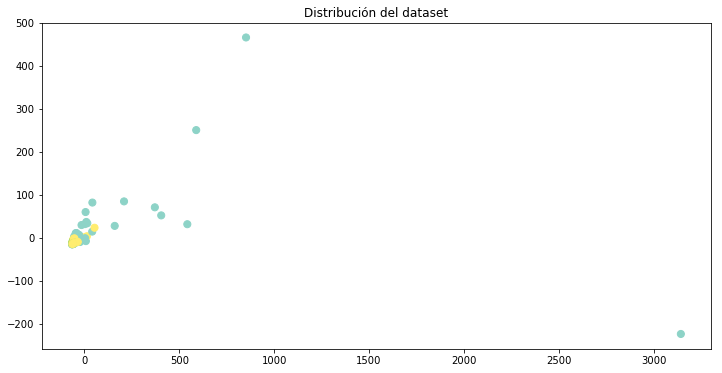

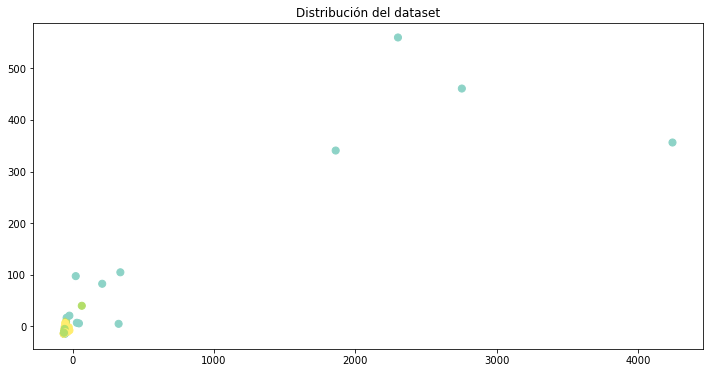

In [25]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)
plot(X_pca_train,y_train)
plot(X_pca_test,y_test)

<p  style="text-align: justify;"> 
    **(k)**  Entrene un modelo de Regresión Logística variando el parámetro de regularización $C$ construyendo un gráfico resumen del error en función de este hiper-parámetro. Además entrene una Máquina de Soporte Vectorial (SVM) con kernel lineal, variando el hiper-parámetro de regularizacion $C$ en el mismo rango que para la Regresión Logística, construyendo el mismo gráfico resumen. Compare.
</p>

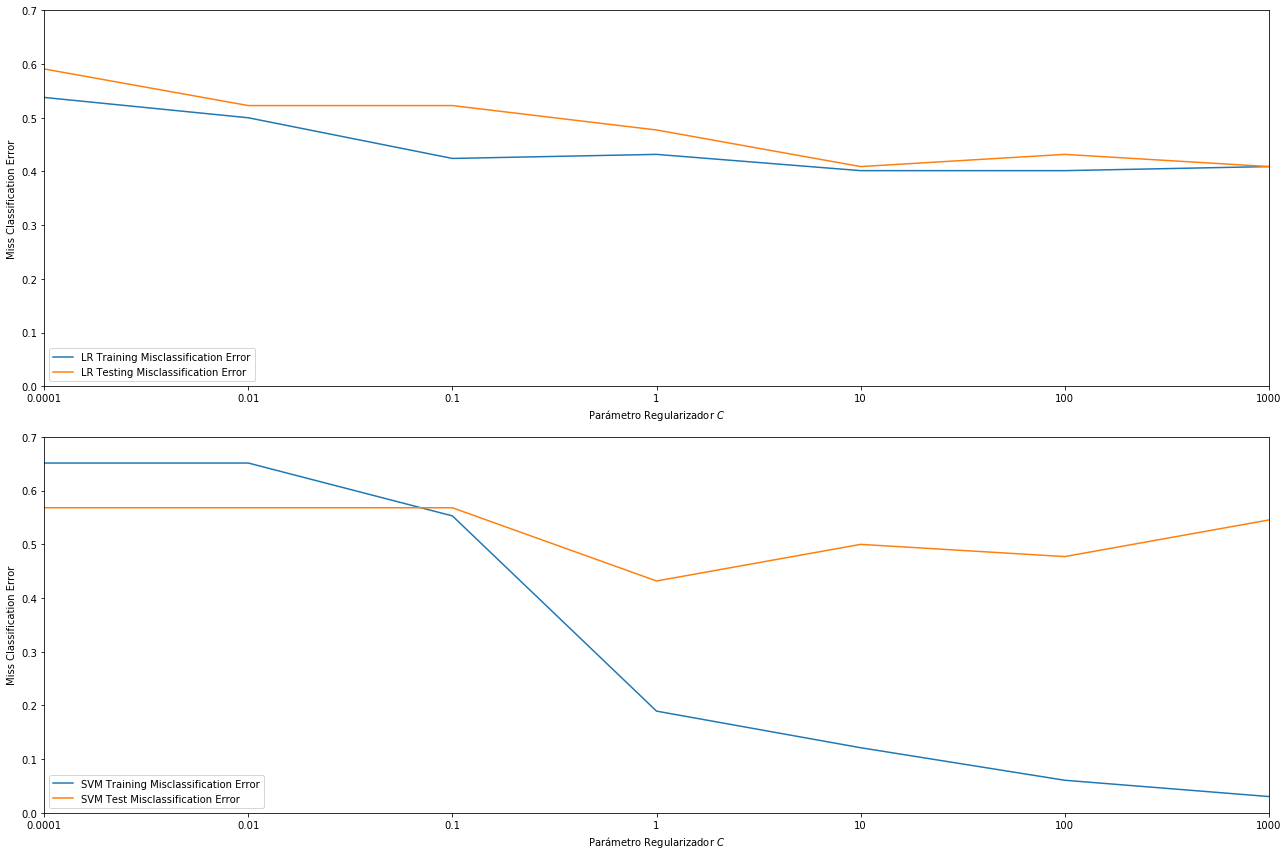

In [26]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM #SVC is for classification
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

def LR_SVM(X_train,y_train,X_test,y_test):
    mse_LR_train = []
    mse_LR_test = []

    mse_SVM_train = []
    mse_SVM_test = []

    Ks = []
    Ks_ticks = [0.0001,0.01,0.1,1,10,100,1000]

    for i, Cs in enumerate((0.0001,0.01,0.1,1,10,100,1000)):

        model_LR = LR(C=Cs)
        model_SVM = SVM(C=Cs)

        model_LR.fit(X_train, y_train)
        model_SVM.fit(X_train, y_train)

        y_pred_LR_train = model_LR.predict(X_train)
        y_pred_LR_test = model_LR.predict(X_test)

        y_pred_SVM_train = model_SVM.predict(X_train)
        y_pred_SVM_test = model_SVM.predict(X_test)

        mse_LR_train.append(1-accuracy_score(y_train, y_pred_LR_train))
        mse_LR_test.append(1-accuracy_score(y_test, y_pred_LR_test))

        mse_SVM_train.append(1-accuracy_score(y_train, y_pred_SVM_train))
        mse_SVM_test.append(1-accuracy_score(y_test, y_pred_SVM_test))

        Ks.append(i+1)

        #print("Miss Classification Loss for LR: %f"%(1-accuracy_score(y_train, y_pred_LR)))
        #print("Miss Classification Loss for SVM: %f"%(1-accuracy_score(y_train, y_pred_SVM)))

        #print("C=%.5f" % Cs)


    plt.figure(figsize=(18,12))

    LR_plot = plt.subplot(2,1,1)
    LR_plot.plot(Ks, mse_LR_train, label='LR Training Misclassification Error')
    LR_plot.plot(Ks, mse_LR_test, label='LR Testing Misclassification Error')
    plt.legend(loc=3)
    plt.xlabel('Parámetro Regularizador $C$')
    plt.ylabel('Miss Classification Error')
    plt.axis([1,6,0.0, 0.7])
    plt.xticks(Ks, Ks_ticks)

    SVM_plot = plt.subplot(2,1,2)    
    SVM_plot.plot(Ks, mse_SVM_train, label = 'SVM Training Misclassification Error')
    SVM_plot.plot(Ks, mse_SVM_test, label = 'SVM Test Misclassification Error')
    plt.legend(loc=3)
    plt.xlabel('Parámetro Regularizador $C$')
    plt.ylabel('Miss Classification Error')
    plt.axis([1,6,0.0, 0.7])
    plt.xticks(Ks, Ks_ticks)

    plt.tight_layout()

    #plt.xlabel('Parametro Regularización $C$')
    #plt.ylabel('Miss Classification Error')

    plt.show()

LR_SVM(X_pca_train,y_train,X_pca_test,y_test)

<p  style="text-align: justify;"> 
Se puede apreciar a través de los gráficos que el método de Regesión Logística empieza con un menor error de entrenamiento y de test cuando el parámetro de regularización $C$ es $0.0001$ en comparación con la SVM, pero a medida de que $C$ aumenta, el parámetro de regularización $C$ regulariza de mejor manera los datos de entrenamiento a través de SVM que de LR, pero regulariza de mejor menera el conjunto de test en LR que en SVM, cuando  $C \rightarrow \infty$. El menor error alcanzado por LR es aproximadamente de $0.4$ en ambos conjuntos de datos, es más, sí $C \rightarrow \infty$, ambos errores convergen a $0.4$. Por otro lado, en SVM el menor error en el conjunto de test converge a 0 sí  $C \rightarrow \infty$, en cambio con el conjunto de test, su menor error es aproximadamente de $0.45$ con $C = 1$. <br>
Luego de este análisis, se puede afirmar que para este conjunto de datos de entrenamiento, es mejor usar SVM con un parámetro de regularización $C$ grande para obtener el menor error posible y utilizar LR con un parámetro de regularización $C$ grande para obtener el menor error posible sobre el conjunto de datos de test.
</p>

<p  style="text-align: justify;"> 
    **(l)**  Entrene un Arbol de Decisión, con la configuración que estime conveniente, variando el hiper-parámetro regularizador _max depth_, construyendo un gráfico resumen del error en función de este parámetro.
Compare con los modelos anteriores.
</p>

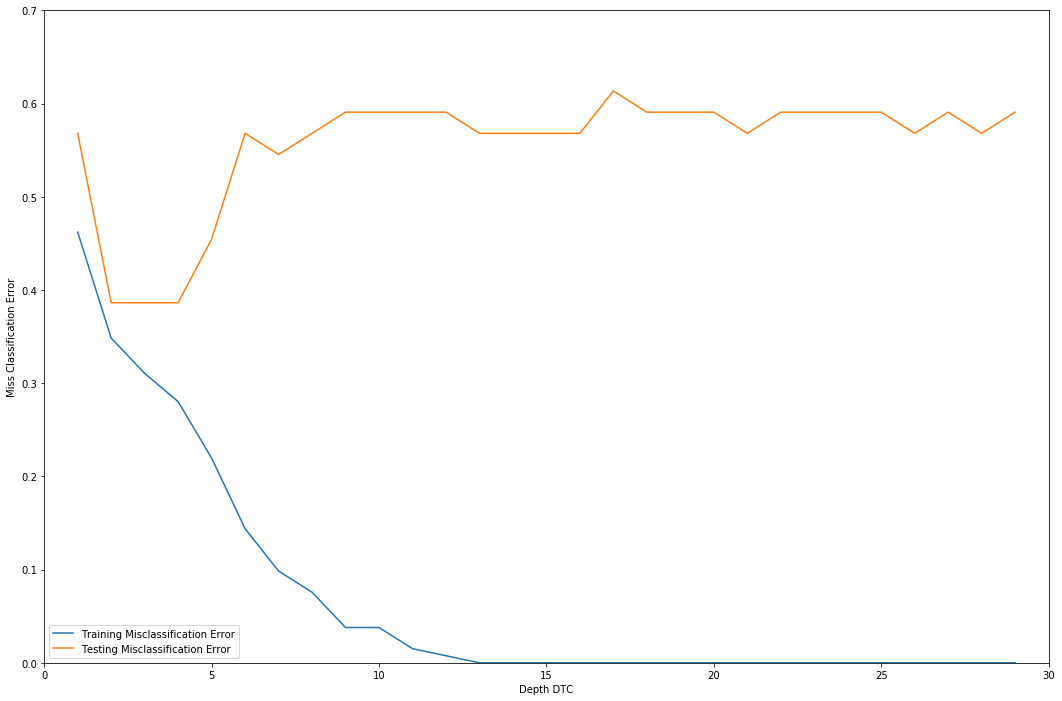

In [27]:
from sklearn.tree import DecisionTreeClassifier as DTC

def DTC_plot(X_pca_train,y_train,X_pca_test,y_test):

    Depths = range(1,30)

    mse_DTC_train = []
    mse_DTC_test = []

    for i in Depths:
        model_DTC = DTC(max_depth = i)

        model_DTC.fit(X_pca_train, y_train)

        y_pred_DTC_train = model_DTC.predict(X_pca_train)
        y_pred_DTC_test = model_DTC.predict(X_pca_test)

        mse_DTC_train.append(1-accuracy_score(y_train, y_pred_DTC_train))
        mse_DTC_test.append(1-accuracy_score(y_test, y_pred_DTC_test))

    plt.figure(figsize=(18,12))

    DTC_plot = plt.subplot(1,1,1)
    DTC_plot.plot(Depths, mse_DTC_train, label='Training Misclassification Error')
    DTC_plot.plot(Depths, mse_DTC_test, label='Testing Misclassification Error')
    plt.legend(loc=3)
    plt.ylabel('Miss Classification Error')
    plt.xlabel('Depth DTC')
    plt.axis([0,30,0.0, 0.7])

    plt.show()

DTC_plot(X_pca_train,y_train,X_pca_test,y_test)

<p  style="text-align: justify;"> 
    En comparación con los resultados anteriores, es posible ver que LR sigue manteniendo superioridad sobre el conjuntos de datos de test, ya que obtiene el menor error entre los 3 métodos. En el caso del conjunto de entrenamiento, el DTC converge a 0 con mayor rápidez que la SVM con un parámetro regularizador $C$ grande. Además, se tiene la ventaja que el DTC es más simple de implementar y gastas menos recursos que la SVM (dependiendo de la profundidad del árbol).
</p>

<p  style="text-align: justify;"> 
    **(m)**  Experimente con diferentes dimensiones $d$ para la proyección de PCA con el propósito de obtener un
modelo con menor error. Construya una tabla o gráfico resumen.
</p>

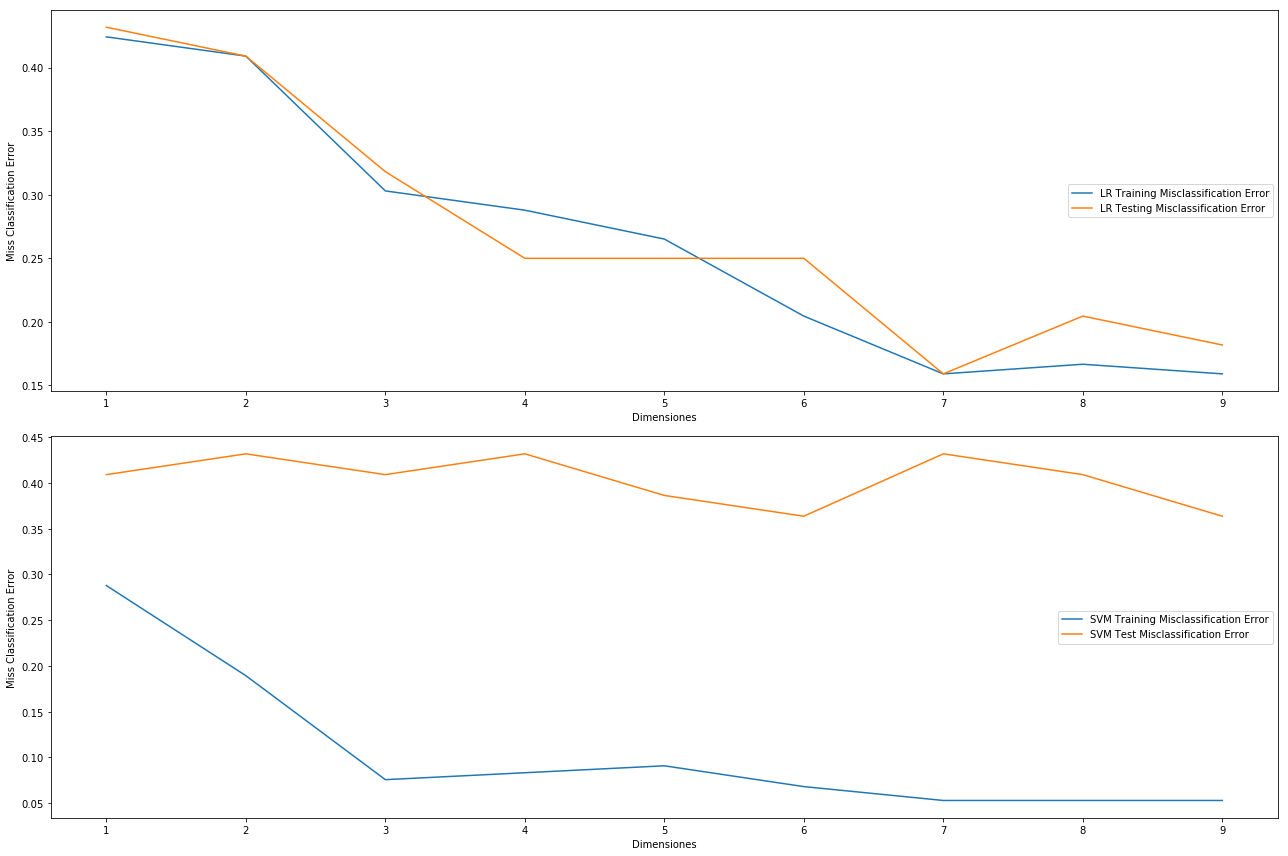

<function __main__.plots_MCE_PCA>

In [28]:
from sklearn.decomposition import PCA
import ipywidgets as widgets

def plots_MCE_PCA(D, C_LR, C_SVM):
    mse_LR_train = []
    mse_LR_test = []
    mse_SVM_train = []
    mse_SVM_test = []

    model_LR = LR(C=1000)
    model_SVM = SVM(C=1)

    dim = np.arange(1,D)

    for d in range(1,D):

        pca_model = PCA(n_components=d)
        pca_model.fit(X_train)

        X_pca_train = pca_model.transform(X_train)
        X_pca_test = pca_model.transform(X_test)

        model_LR.fit(X_pca_train, y_train)
        model_SVM.fit(X_pca_train, y_train)

        y_pred_LR_train = model_LR.predict(X_pca_train)
        y_pred_LR_test = model_LR.predict(X_pca_test)

        y_pred_SVM_train = model_SVM.predict(X_pca_train)
        y_pred_SVM_test = model_SVM.predict(X_pca_test)

        mse_LR_train.append(1-accuracy_score(y_train, y_pred_LR_train))
        mse_LR_test.append(1-accuracy_score(y_test, y_pred_LR_test))
        mse_SVM_train.append(1-accuracy_score(y_train, y_pred_SVM_train))
        mse_SVM_test.append(1-accuracy_score(y_test, y_pred_SVM_test))


    plt.figure(figsize=(18,12))

    LR_plot = plt.subplot(2,1,1)
    LR_plot.plot(dim, mse_LR_train, label='LR Training Misclassification Error')
    LR_plot.plot(dim, mse_LR_test, label='LR Testing Misclassification Error')
    plt.legend(loc='center right')
    plt.xlabel('Dimensiones')
    plt.ylabel('Miss Classification Error')

    SVM_plot = plt.subplot(2,1,2)    
    SVM_plot.plot(dim, mse_SVM_train, label = 'SVM Training Misclassification Error')
    SVM_plot.plot(dim, mse_SVM_test, label = 'SVM Test Misclassification Error')
    plt.legend(loc='center right')
    plt.xlabel('Dimensiones')
    plt.ylabel('Miss Classification Error')
    plt.tight_layout()

    #plt.xlabel('Parametro Regularización $C$')
    #plt.ylabel('Miss Classification Error')

    plt.show()  

widgets.interact(plots_MCE_PCA,D = (1,20),C_LR = (1,1000,1),C_SVM=(1,1000,1))

<p  style="text-align: justify;"> 
    **(n)**  Realice otra reducción de dimensionalidad ahora a través de la técnica LDA, para representar los datos en $d = 2$ dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra un warning explique el porqué. Visualice apropiadamente la proyección en $2$ dimensiones.
</p>

C:\Users\EntE\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


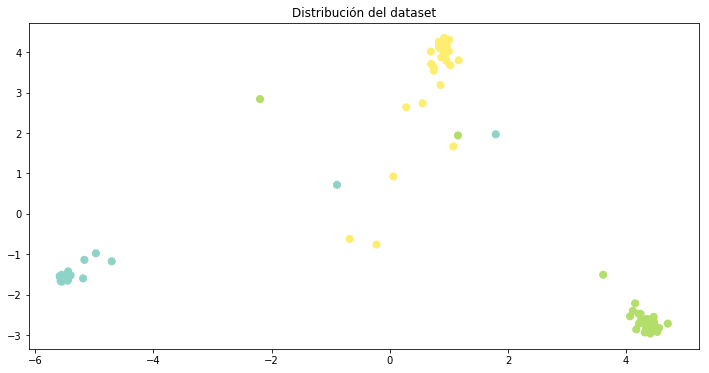

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_lda_train = model_lda.transform(X_train)
X_lda_test = model_lda.transform(X_test)

plot(X_lda_train, y_train)
#plot(X_pca_test, y_test)

#y_pred_lda = model_lda.predict(X_pca_train)

#visualize_border(model_lda, X_train, y_train,"LDA")
#print(X_pca_train)
#https://stats.stackexchange.com/questions/29385/collinear-variables-in-multiclass-lda-training

<p  style="text-align: justify;"> 
   Aparece un warning para advertir que hay variables o atributos colineales, es decir, que son linealmente dependientes entre ellos.
</p>

<p  style="text-align: justify;"> 
    **(o)**  Con el propósito de encontrar el mejor modelo vuelva a realizar el item k) con el l) en el nuevo espacio generado por la representación según las d dimensiones de la proyección LDA. Esta nueva representación ¿mejora o empeora el desempeño? Explique.
</p>

C:\Users\EntE\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


(132, 2)
(44, 2)


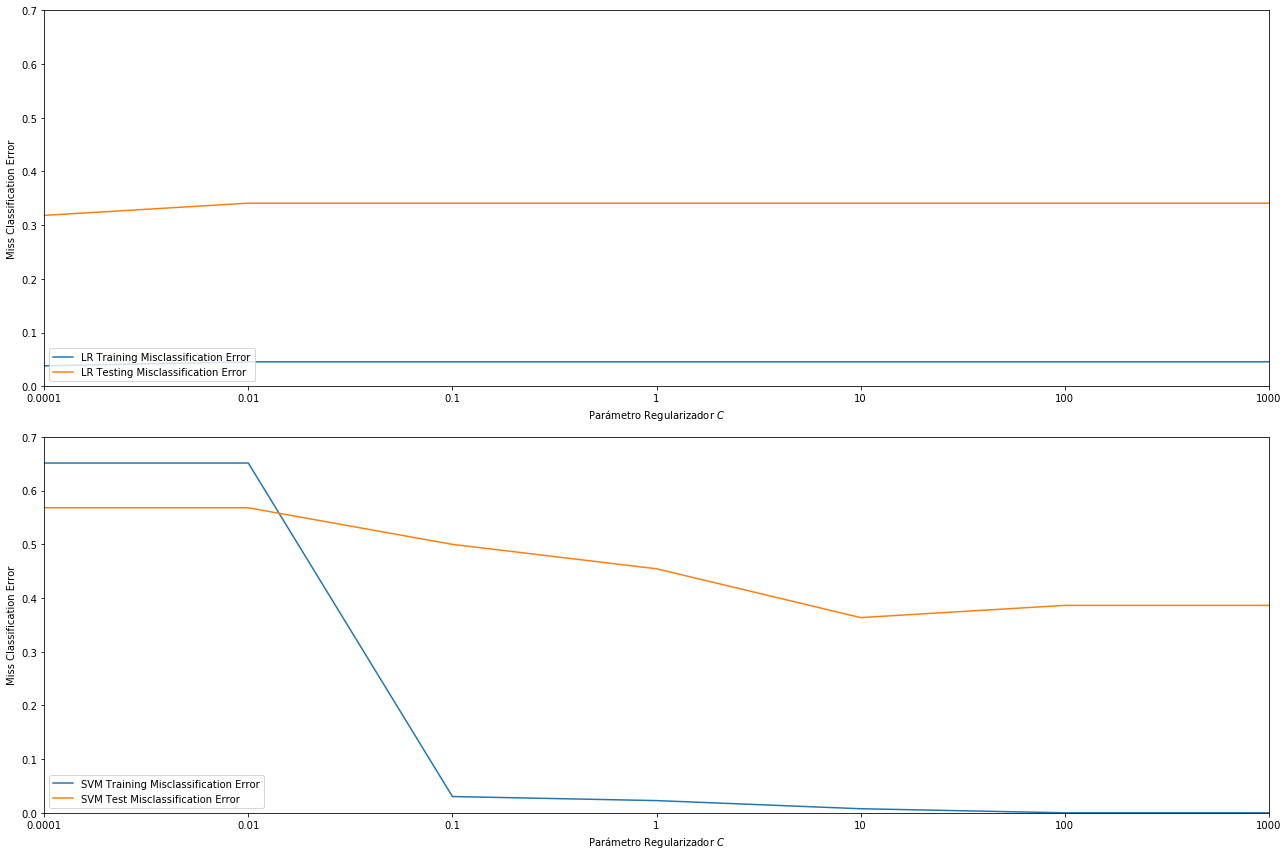

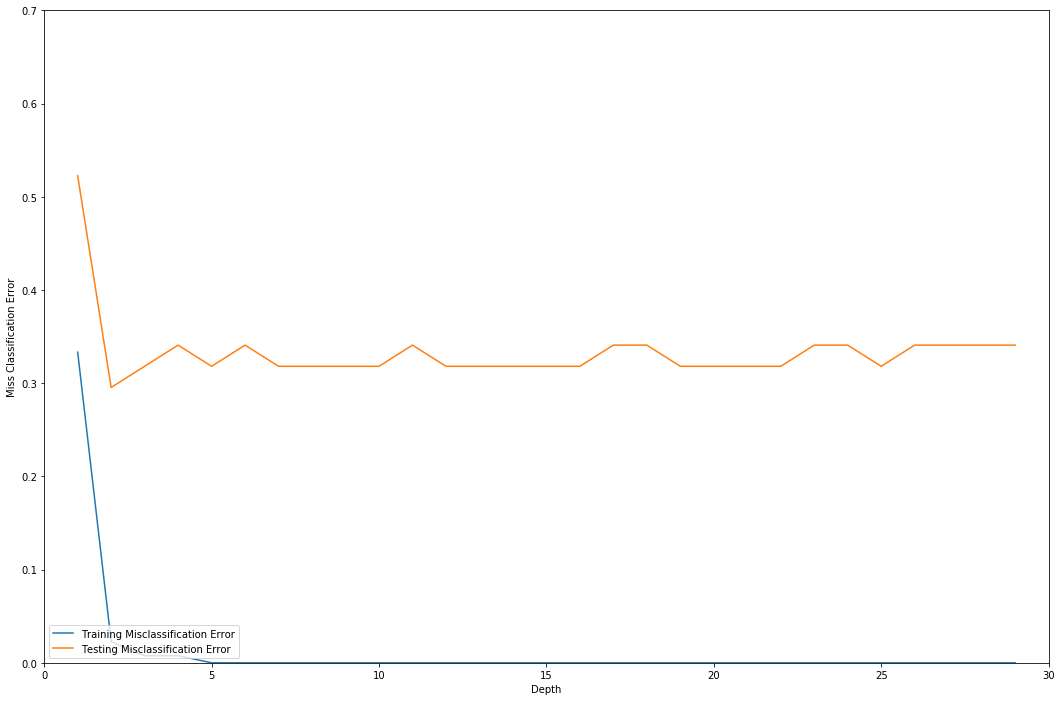

In [30]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM #SVC is for classification
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.tree import DecisionTreeClassifier as DTC


model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_lda_train = model_lda.transform(X_train)
X_lda_test = model_lda.transform(X_test)

print(X_lda_train.shape)
print(X_lda_test.shape)

def LR_SVM_DTC(X_train,y_train,X_test,y_test):

    mse_LR_train = []
    mse_LR_test = []

    mse_SVM_train = []
    mse_SVM_test = []

    Ks = []
    Ks_ticks = [0.0001,0.01,0.1,1,10,100,1000]

    for i, Cs in enumerate((0.0001,0.01,0.1,1,10,100,1000)):

        model_LR = LR(C=Cs)
        model_SVM = SVM(C=Cs)

        model_LR.fit(X_train, y_train)
        model_SVM.fit(X_train, y_train)

        y_pred_LR_train = model_LR.predict(X_train)
        y_pred_LR_test = model_LR.predict(X_test)

        y_pred_SVM_train = model_SVM.predict(X_train)
        y_pred_SVM_test = model_SVM.predict(X_test)

        mse_LR_train.append(1-accuracy_score(y_train, y_pred_LR_train))
        mse_LR_test.append(1-accuracy_score(y_test, y_pred_LR_test))

        mse_SVM_train.append(1-accuracy_score(y_train, y_pred_SVM_train))
        mse_SVM_test.append(1-accuracy_score(y_test, y_pred_SVM_test))

        Ks.append(i+1)

        #print("Miss Classification Loss for LR: %f"%(1-accuracy_score(y_train, y_pred_LR)))
        #print("Miss Classification Loss for SVM: %f"%(1-accuracy_score(y_train, y_pred_SVM)))

        #print("C=%.5f" % Cs)


    plt.figure(figsize=(18,12))

    LR_plot = plt.subplot(2,1,1)
    LR_plot.plot(Ks, mse_LR_train, label='LR Training Misclassification Error')
    LR_plot.plot(Ks, mse_LR_test, label='LR Testing Misclassification Error')
    plt.legend(loc=3)
    plt.xlabel('Parámetro Regularizador $C$')
    plt.ylabel('Miss Classification Error')
    plt.axis([1,6,0.0, 0.7])
    plt.xticks(Ks, Ks_ticks)

    SVM_plot = plt.subplot(2,1,2)    
    SVM_plot.plot(Ks, mse_SVM_train, label = 'SVM Training Misclassification Error')
    SVM_plot.plot(Ks, mse_SVM_test, label = 'SVM Test Misclassification Error')
    plt.legend(loc=3)
    plt.xlabel('Parámetro Regularizador $C$')
    plt.ylabel('Miss Classification Error')
    plt.axis([1,6,0.0, 0.7])
    plt.xticks(Ks, Ks_ticks)

    plt.tight_layout()

    #plt.xlabel('Parametro Regularización $C$')
    #plt.ylabel('Miss Classification Error')

    plt.show()


    Depths = range(1,30)

    mse_DTC_train = []
    mse_DTC_test = []

    for i in Depths:
        model_DTC = DTC(max_depth = i)

        model_DTC.fit(X_train, y_train)

        y_pred_DTC_train = model_DTC.predict(X_train)
        y_pred_DTC_test = model_DTC.predict(X_test)

        mse_DTC_train.append(1-accuracy_score(y_train, y_pred_DTC_train))
        mse_DTC_test.append(1-accuracy_score(y_test, y_pred_DTC_test))

    plt.figure(figsize=(18,12))

    DTC_plot = plt.subplot(1,1,1)
    DTC_plot.plot(Depths, mse_DTC_train, label='Training Misclassification Error')
    DTC_plot.plot(Depths, mse_DTC_test, label='Testing Misclassification Error')
    plt.legend(loc=3)
    plt.ylabel('Miss Classification Error')
    plt.xlabel('Depth')
    plt.axis([0,30,0.0, 0.7])

    plt.show()
LR_SVM_DTC(X_lda_train,y_train,X_lda_test,y_test)

<p  style="text-align: justify;"> 
   <ul>
       <li>LR:
           <ul>
             <li>Error de Entrenamiento: Al empezar mejora de un 0.55 a un 0.05 aproximadamente y se mantiene constante, logrando una notable diferencia con respecto al error de 0.4 obtenido anteriormente en el punto k).</li>
             <li>Error de Test: Al empezar mejora de un 0.6 a un 0.3 aproximadamente y se mantiene constante en 0.3, obteniendo un mejor resultado que el anterior, ya que este convergia a 0.4.</li>
           </ul>
       </li>
       <li>SVM:
            <ul>
             <li>Error de Entrenamiento: empieza con el mismo error pero converge más rápido a 0 a medida de que el parámetro regularizador $C$ aumenta. Anteriormente se tenía que con un $C > 1000$ convergía a 0, en cambio ahora con los datos ajustados con LDA, basta con un $C = 30$.</li>
             <li>Error de Test: al igual que en el error de entrenamiento, empieza con el mismo error pero logra un error menor a medida de que el parámetro regularizador $C$ crece. En este caso, el mínimo error de test es de un 0.4, una décima más grande que el error anterior.</li>
           </ul>
       </li>
       <li>DTC:
            <ul>
             <li>Error de Entrenamiento: converge de manera más rápida, ya que con profundida igual a 5, el error de entrenamiento alcanza el valor 0.</li>
             <li>Error de Test: En este caso, aumenta el error de test en comparación en el punto l) en aproximadamente 0.05 décimas.</li>
           </ul>
       </li>
   </ul>
</p>

<p  style="text-align: justify;"> 
    **(p)**  Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias características (_feature crafting_) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros trabajos [6] [7] si desea.
</p>

- [6]  https://www.kaggle.com/primaryobjects/voicegender/data
- [7]  Gamit, M. R., Dhameliya, P. K., & Bhatt, N. S. (2015). Classification Techniques for Speech Recognition: A Review. vol, 5, 58-63.


In [31]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
from scipy.stats import skew
from scipy import stats
from statistics import mode, StatisticsError

def centroide(X,Y):
    return [sum(X)/len(X),sum(Y)/len(Y)]

df = pd.read_csv('./heartbeat-sounds/set_a.csv')
df.drop(['dataset','sublabel',],axis=1,inplace=True)
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./heartbeat-sounds/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series'] = new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
             2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
             1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,
             2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
             0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
new_df.head()
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
data = np.zeros((X.shape[0],13))

for i in range(0,X.shape[0]):
    data[i][0] = np.mean(X[i])
    data[i][1] = np.median(X[i])
    data[i][2] = np.std(X[i])
    data[i][3] = (pd.Series(X[i])).quantile(0.25)
    data[i][4] = (pd.Series(X[i])).quantile(0.75)
    data[i][5] = iqr(X[i])
    data[i][6] = skew(X[i])
    try:
        data[i][7] = mode(X[i])
    except StatisticsError:
        data[i][7] = 0
        
    data[i][8] = min(X[i])    
    data[i][9] = max(X[i])
    data[i][10] = np.mean(np.fft.fftfreq(len(X[i])))
    if i < X.shape[0]-1:
        data[i][11] = centroide(X[i],X[i+1])[0]
        data[i][12] = centroide(X[i],X[i+1])[1]
        

#https://www.kaggle.com/primaryobjects/voicegender

In [32]:
headers = ["Mean","Median", "Std","Q25","Q75","IQR","Skew","Mode","Min","Max","MFreq","Centroide i", "Centroide i+1"]
df2 = pd.DataFrame(data = data, columns = headers)
df2.head()

,Mean,Median,Std,Q25,Q75,IQR,Skew,Mode,Min,Max,MFreq,Centroide i,Centroide i+1
0,-0.448770,0.0,587.749387,-224.0,221.0,445.0,-1.071065,0.0,-29660.0,28892.0,-0.000001,-0.448770,-0.516712
1,-0.516712,0.0,196.353850,-8.0,8.0,16.0,-0.432771,0.0,-2361.0,3664.0,-0.000001,-0.516712,-2.684462
2,-2.684462,0.0,315.862301,-31.0,31.0,62.0,-0.434863,0.0,-4624.0,4674.0,-0.000001,-2.684462,13.039756
3,13.039756,0.0,2684.191294,-624.0,505.0,1129.0,1.077141,0.0,-19925.0,24559.0,-0.000001,13.039756,-3.958103
4,-3.958103,0.0,2534.645774,-341.0,323.0,664.0,-0.631108,0.0,-23746.0,18192.0,-0.000001,-3.958103,-1.844220


In [33]:
data_fourier = np.abs(np.fft.fft(data))
data_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = data_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    data_resampled.append(resampled_sequence)

data_resampled = np.array(data_resampled)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=43)
print("El set de entrenamiento tiene " + str(len(X_train)) 
      + " y el set de test tiene " + str(len(X_test)) 
      + " datos, y ambos tienen 10000 clases")
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

El set de entrenamiento tiene 132 y el set de test tiene 44 datos, y ambos tienen 10000 clases


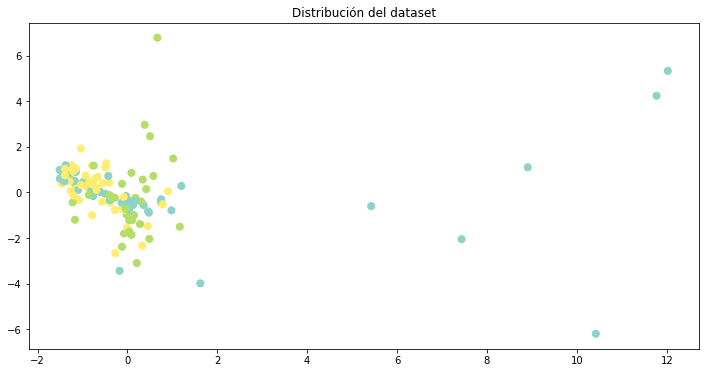

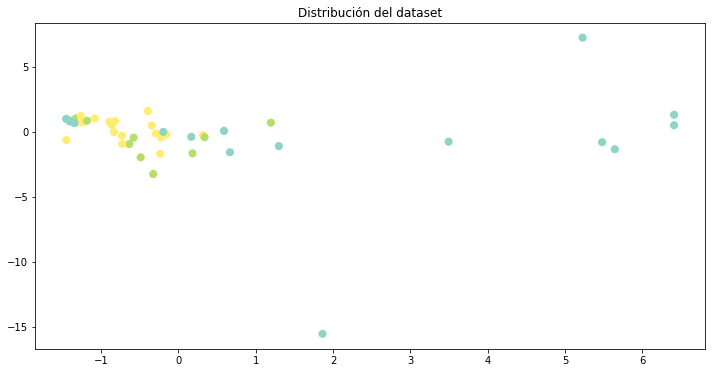

In [35]:
pca_model = PCA(n_components=2)
pca_model.fit(X_train,y_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)
plot(X_pca_train,y_train)
plot(X_pca_test,y_test)

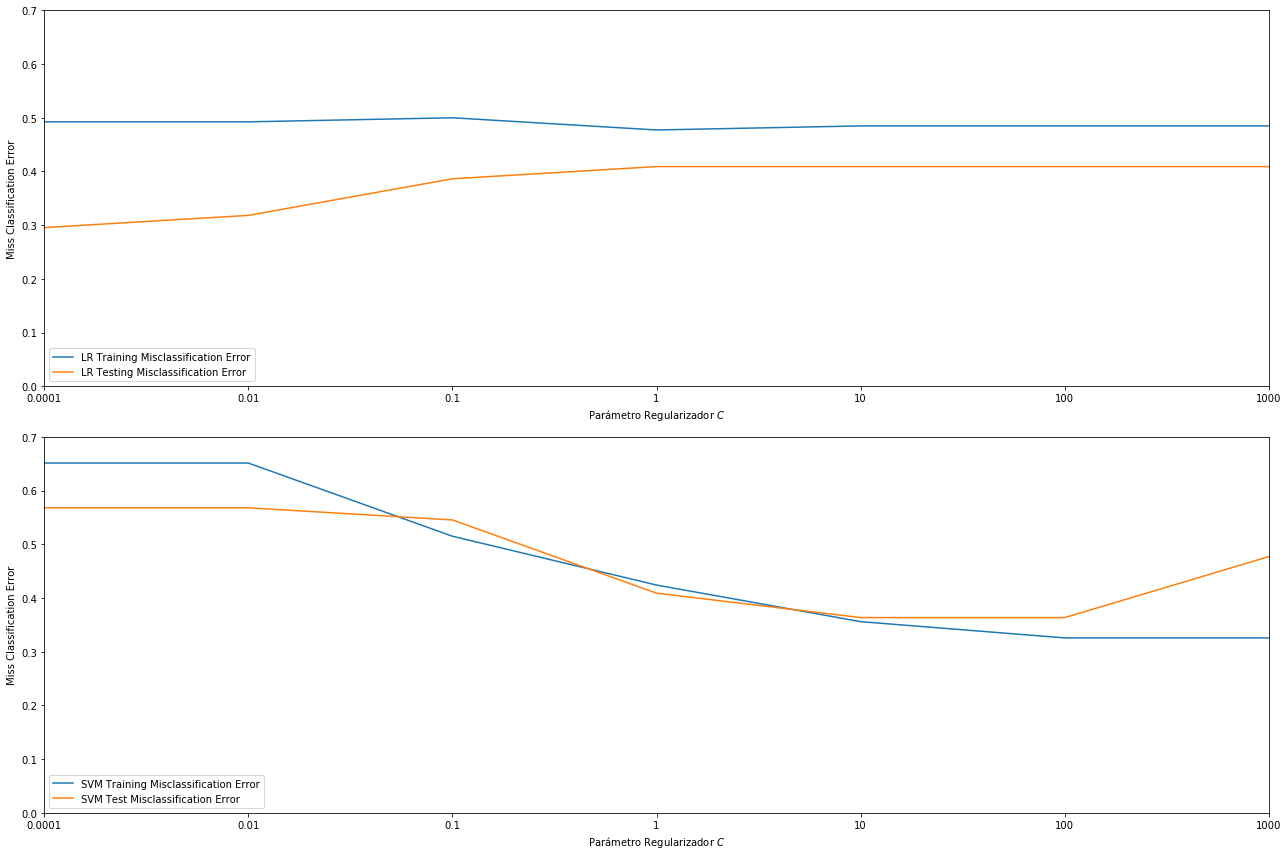

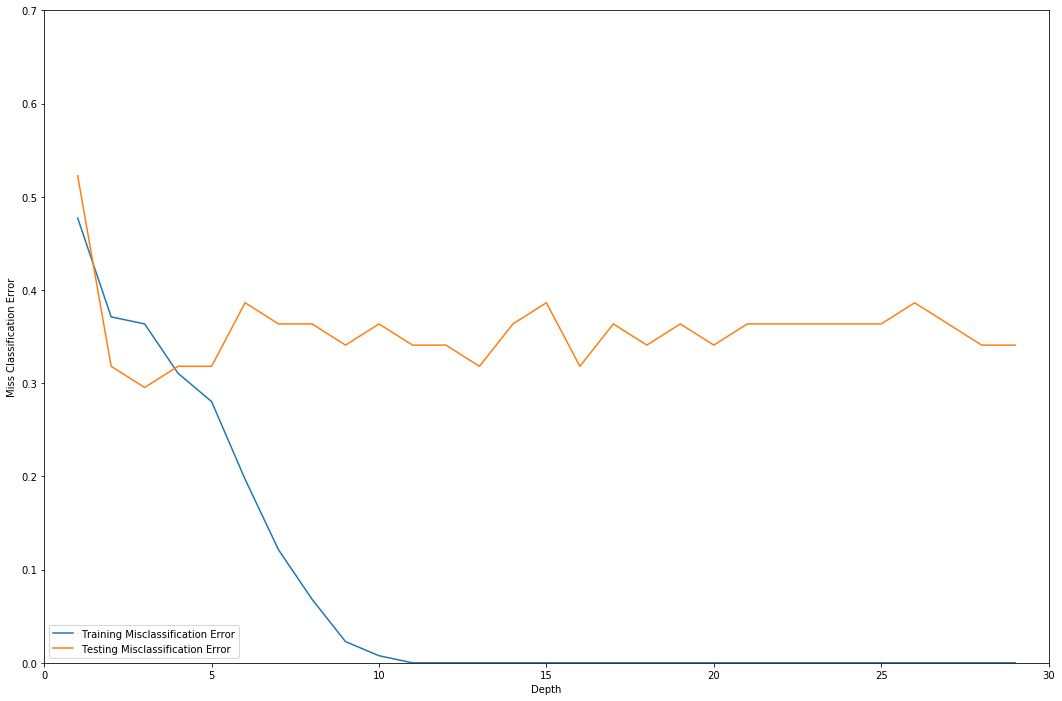

In [36]:
LR_SVM_DTC(X_pca_train,y_train,X_pca_test,y_test)

<p  style="text-align: justify;"> 
   <ul>
       <li>LR:
           <ul>
             <li>Error de Test: Se obtiene un menor error de test que con los datos anteriormente seleccionados, al ocupar un parámetro regularizador de 0.0001 se obtiene el menor error de 0.3.</li>
           </ul>
       </li>
       <li>SVM:
            <ul>
             <li>Error de Test: No se mejora mucho en comparación con los datos anteriores, pero se obtiene un error de 0.4 aproximadamente cuando se ocupa un parámetro regularizador $10 <= C <= 100$.</li>
           </ul>
       </li>
       <li>DTC:
            <ul>
             <li>Error de Test: Se obtiene el mínimo error de test, un 0.3</li>
           </ul>
       </li>
   </ul>
</p>

C:\Users\EntE\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


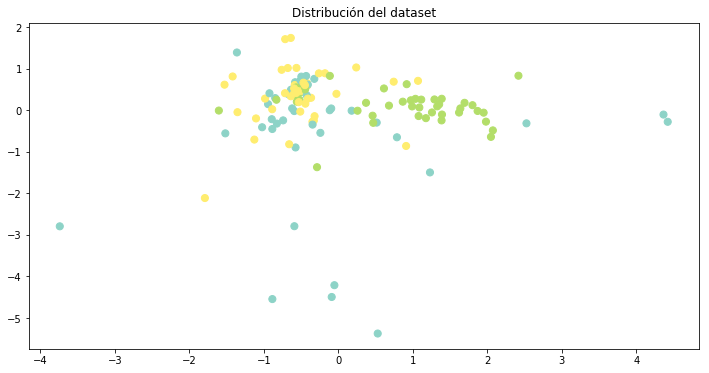

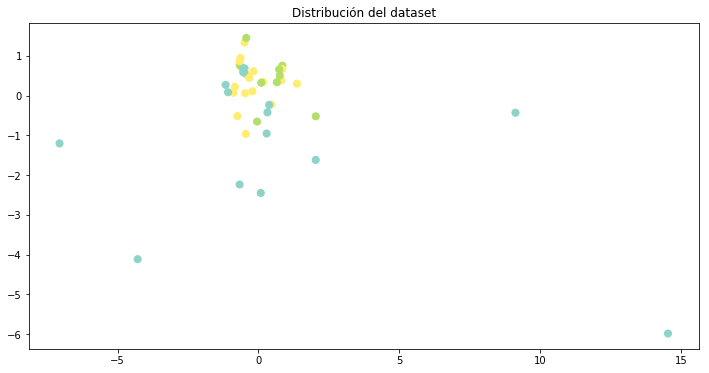

In [37]:
lda_model = LDA(n_components=2)
lda_model.fit(X_train,y_train)
X_lda_train = lda_model.transform(X_train)
X_lda_test = lda_model.transform(X_test)
plot(X_lda_train,y_train)
plot(X_lda_test,y_test)

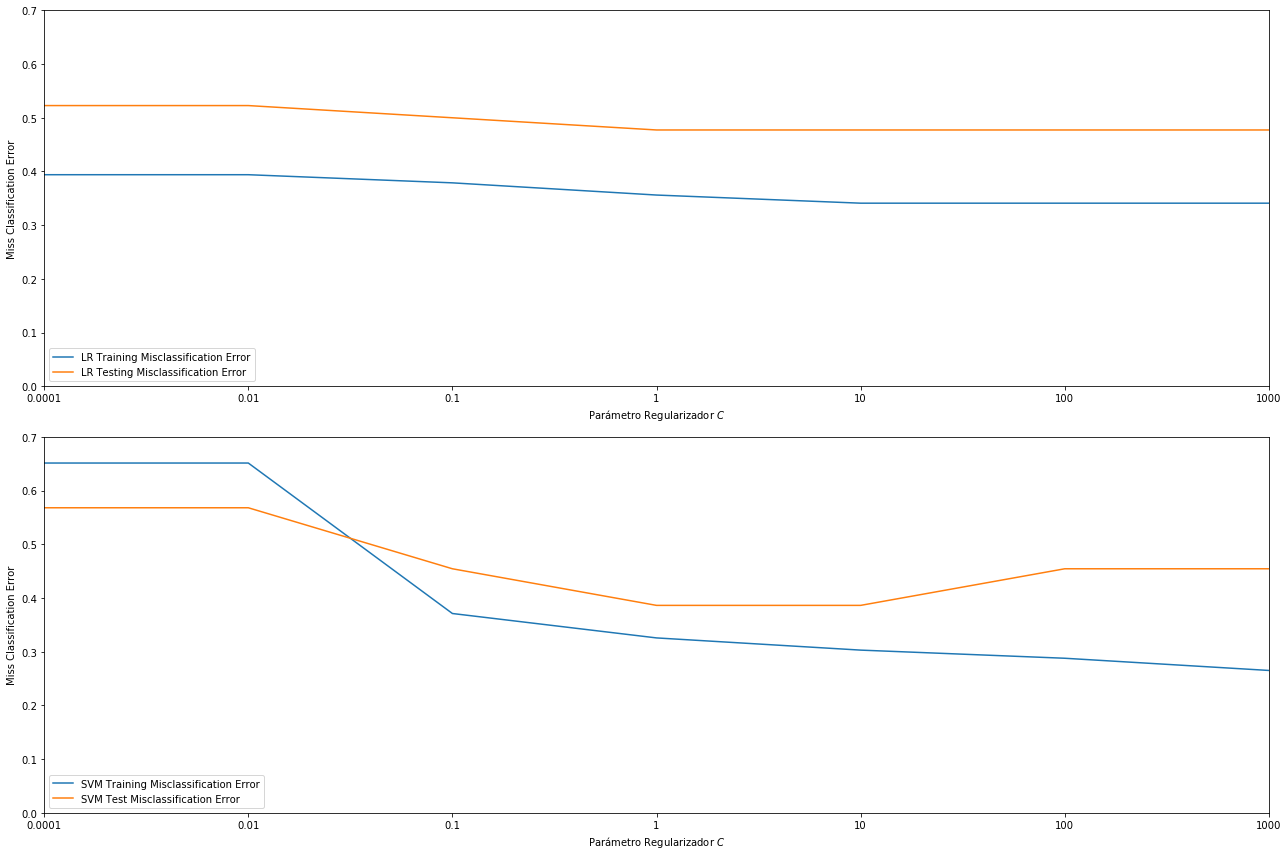

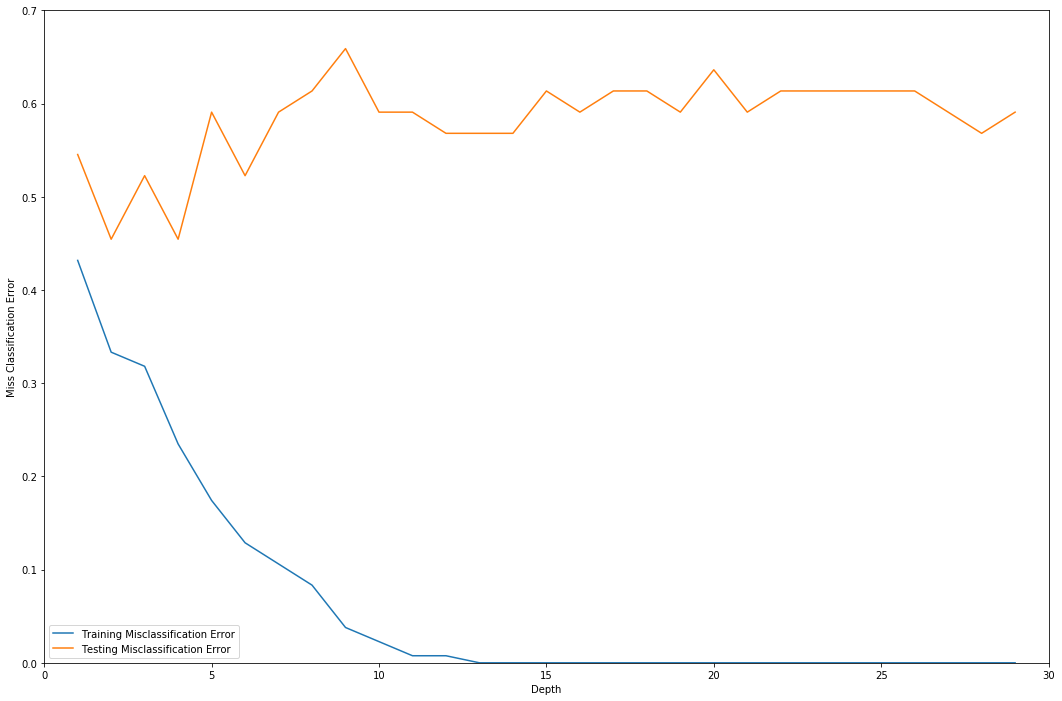

In [38]:
LR_SVM_DTC(X_lda_train,y_train,X_lda_test,y_test)

# 3 Análisis de emociones en tweets

<p  style="text-align: justify;"> 
    **(a)**  Construya un dataframe con los datos a analizar. Determine cuántas clases existen, cuántos registros por clase y describa el _dataset_.

</p>

In [39]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\EntE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

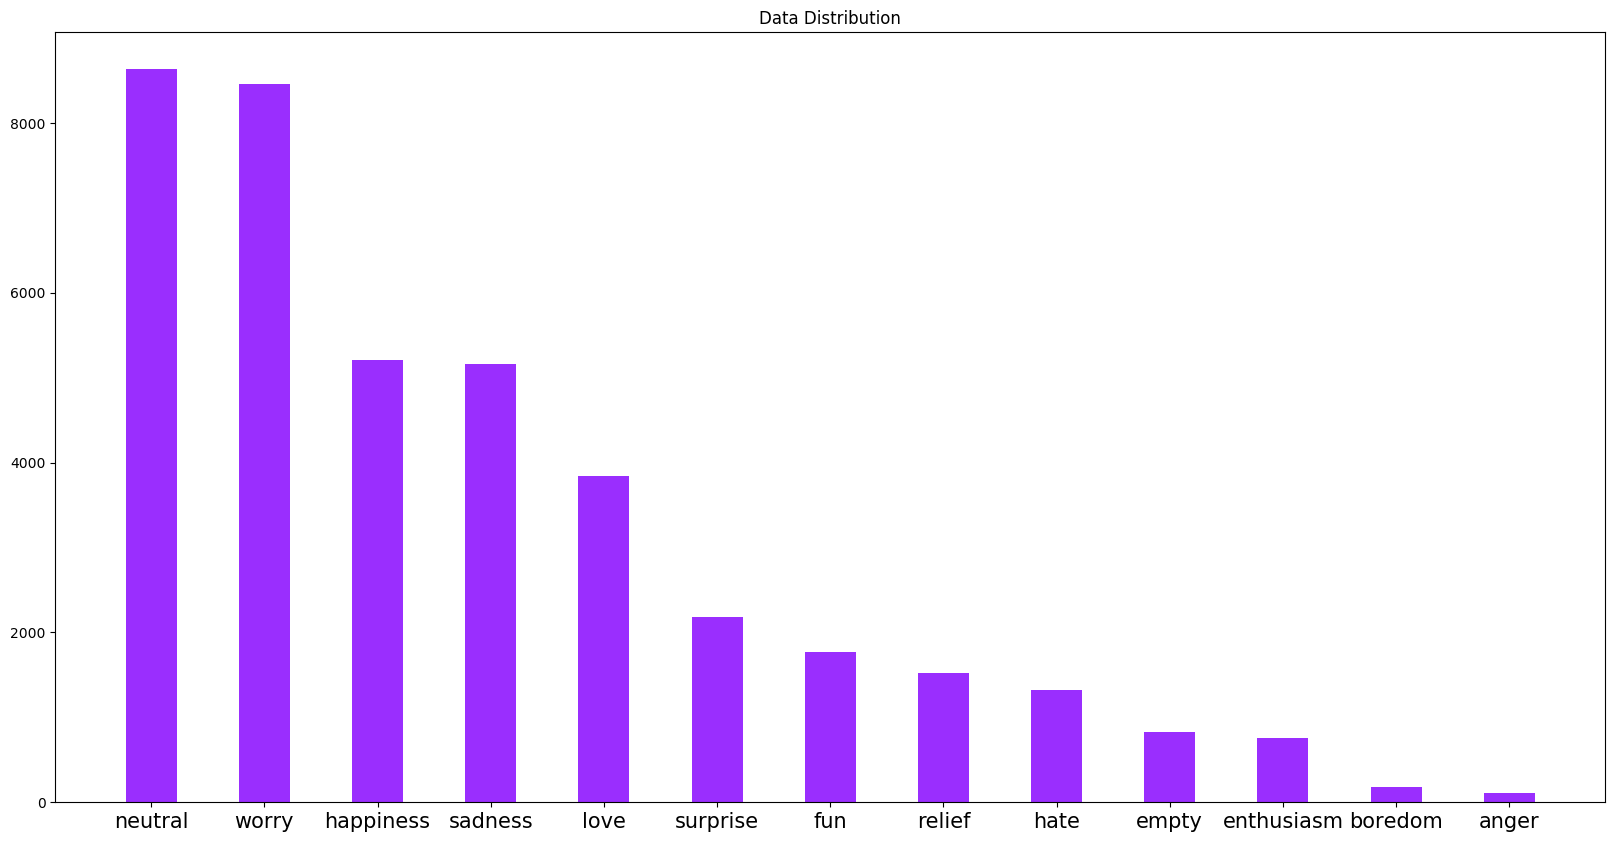

In [40]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
df = pd.read_csv('./text_emotion.csv')
df_copia = df.copy()
valores = df.sentiment.value_counts()
def plot_valores(valores):
    plt.rcdefaults()
    fig, ax = plt.subplots(figsize=(20, 10))
    location = np.arange(len(valores))
    width = 0.45
    uno = ax.bar(location, valores.values(),  width, align='center', color="#9A2EFE")
    ax.set_xticks(location)
    ax.set_xticklabels(list(valores.keys()), fontsize=15)
    ax.set_title('Data Distribution')
    plt.show()
    return

plot_valores(dict(valores))

| Sentimiento | Registro |
|:-----------:|:--------:|
|   Neutral   |   8638   |
|    Worry    |   8459   |
|  Happiness  |   5209   |
|   Sadness   |   5165   |
|     Love    |   3842   |
|   Surprise  |   2187   |
|     Fun     |   1776   |
|    Relief   |   1526   |
|     Hate    |   1323   |
|    Empty    |    827   |
|  Enthusiasm |    759   |
|   Boredom   |    179   |
|    Anger    |    110   |

<p  style="text-align: justify;"> 
    **(b)**  Construya un conjunto de entrenamiento y otro de pruebas, a través de una máscara aleatoria, para verificar los resultados de los algoritmos.
</p>

In [41]:
import numpy as np
np.random.seed(22)
msk = np.random.rand(len(df)) < 0.8

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=43)

#print(df['content'][2])
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


<p  style="text-align: justify;"> 
    **(c)**  Implemente y explique un pre-procesamiento para los tweets para dejarlos en un formato estándarizado
en el cual se podrán trabajar.

</p>

In [42]:
df.drop(['tweet_id','author'],axis=1,inplace=True)

In [43]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\[\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]


tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=True):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

#print(preprocess(df['content'][0]))

#df['content'] = df['content'].str
df['content'] = df['content'].apply(preprocess)


In [44]:
stop_words = ["rt","via","a","able","about","across","after","all","almost","also","am","among","an","and","any","are","as","at","be","because","been","but","by","can","cannot","could","dear","did","do","does","either","else","ever","every","for","from","get","got","had","has","have","he","her","hers","him","his","how","however","i","if","in","into","is","it","its","just","least","let","like","likely","may","me","might","most","must","my","neither","no","nor","not","of","off","often","on","only","or","other","our","own","rather","said","say","says","she","should","since","so","some","than","that","the","their","them","then","there","these","they","this","tis","to","too","twas","us","wants","was","we","were","what","when","where","which","while","who","whom","why","will","with","would","yet","you","your"]
stop = stopwords.words('english')
result = list(set(stop)|set(stop_words)|set(list('abcdefghijklmnopqrstuvwxyz')) | set(list('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')) | set(list('0123456789')))

df['content'] = df['content'].apply(lambda x: [item for item in x if item not in result])
df.head()

,sentiment,content
0,empty,"[@tiffanylue, know, listenin, bad, habit, earl..."
1,sadness,"[layin, bed, headache, ughhhh, waitin, call]"
2,sadness,"[funeral, ceremony, gloomy, friday]"
3,enthusiasm,"[hang, friends, soon]"
4,neutral,"[@dannycastillo, want, trade, someone, houston..."


<p  style="text-align: justify;"> 
    **(d)**  Haga una reducción binaria al problema, para trabajarlo como un problema de clasificación de dos clases.
Para esto, agrupe las distintas emociones como positivas y negativas (defina un criterio), se recomienda
codificar las clases como +1 y −1 respectivamente. Recuerde tener presente que el desbalanceo de los
datos puede afectar considerablemente al modelo.

</p>

In [45]:
uno = ['happiness', 'love', 'fun', 'relief', 'enthusiasm']

df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x in uno else -1)
df.sentiment.value_counts()

-1    26888
 1    13112
Name: sentiment, dtype: int64

<p  style="text-align: justify;"> 
    **(e)**  Para construir un clasificador que determine automáticamente la polaridad de un trozo de texto, será
necesario representar los tweets $\{t_i\}_{i=1}^{n}$ disponibles como vectores de características (features). El tipo
de características más utilizado consiste en contar cuántas veces aparecen ciertos términos/palabras en
el texto. Para esto, es necesario un vocabulario que, por lo general, se construye mediante la unión de
todas las palabras que se observen en los tweets.

</p>
<p  style="text-align: justify;">
Se recomienda utilizar las librerías ofrecidas por sklearn de feature extraction in text [12] (_CountVectorizer_ y _TfidfVectorizer_). Recuerde realizar el ajuste (_fit_) únicamente con el conjunto de entrenamiento, para luego transformar el conjunto de pruebas (con el método transform).

</p>


- [12] http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

X = df['content'].values
y = df.sentiment.values
XX = df_copia['content'].values
yy = y.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.3, random_state=22)
 
def fake(x):
    return x

#vectorizer = TfidfVectorizer(tokenizer=fake, preprocessor=fake, lowercase=False)

vectorizer = CountVectorizer(tokenizer=fake, preprocessor=fake, lowercase=False)
#CV_fit = CV_model.fit_transform(X_train.tostring())
#X_CV_train = CV_model.transform(X_train)

X_CV_train = vectorizer.fit_transform(X_train)
X_CV_test = vectorizer.transform(X_test)

<p  style="text-align: justify;"> 
    **(f)**  Entrene y compare al menos 5 de los diferentes clasificadores vistos en clases para clasificación binaria (por ejemplo: Navie Bayes, Multinomial Naive Bayes, LDA, QDA, Regresión logística, SVM y Arboles de decisión) sobre el conjunto de entrenamiento verificando su desempeño sobre ambos conjuntos (entrenamiento y de pruebas), construyendo un gráfico resumen del error de éstos.

</p>

In [47]:
import matplotlib.pyplot as plt
def plot_comparation(ScoreTrain, ScoreTest):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    location = np.arange(len(ScoreTrain))
    width = 0.45
    
    uno = ax.barh(location, ScoreTrain.values(),  width, align='center', color="#F5A9F2")
    dos = ax.barh(location + width, ScoreTest.values(), width, align='center', color="#A9F5F2")
    ax.set_yticks(location + width/2)
    ax.set_yticklabels(("NB", "DTC", "LR", "KNC", "MLPC"))
    
    ax.set_xlabel('Score')
    ax.set_title('Train and Test Score')
    ax.legend((uno[0], dos[0]), ('Train', 'Test'), bbox_to_anchor=(1,0.6))
    #autolabel(uno)
    #autolabel(dos)
    ax.invert_yaxis()
    plt.show()
    return

ScoreTrain = {}
ScoreTest = {}

In [48]:
from sklearn.naive_bayes import BernoulliNB
nb_model = BernoulliNB()
nb_model.fit(X_CV_train, y_train)

ScoreTrain["NB Train"] = nb_model.score(X_CV_train, y_train)
ScoreTest["NB Test"] = nb_model.score(X_CV_test, y_test)

print("NB Train score %f"%ScoreTrain["NB Train"])
print("NB Test score %f"%ScoreTest["NB Test"])

NB Train score 0.840857
NB Test score 0.724167


In [49]:
from sklearn.tree import DecisionTreeClassifier as DTC
DTC_model = DTC()
DTC_model.fit(X_CV_train, y_train)

ScoreTrain["DTC Train"] = DTC_model.score(X_CV_train, y_train)
ScoreTest["DTC Test"] = DTC_model.score(X_CV_test, y_test)

print("DTC Train score %f"%ScoreTrain["DTC Train"])
print("DTC Test score %f"%ScoreTest["DTC Test"])

DTC Train score 0.997714
DTC Test score 0.713000


In [50]:
from sklearn.linear_model import LogisticRegression as LR
LR_model = LR()
LR_model.fit(X_CV_train, y_train)

ScoreTrain["LR Train"] = LR_model.score(X_CV_train, y_train)
ScoreTest["LR Test"] = LR_model.score(X_CV_test, y_test)

print("LR Train score %f"%ScoreTrain["LR Train"])
print("LR Test score %f"%ScoreTest["LR Test"])

LR Train score 0.898786
LR Test score 0.750500


In [51]:
from sklearn.neighbors import KNeighborsClassifier as KNC
KNC_model = KNC()
KNC_model.fit(X_CV_train, y_train)

ScoreTrain["KNC Train"] = KNC_model.score(X_CV_train, y_train)
ScoreTest["KNC Test"] = KNC_model.score(X_CV_test, y_test)

print("KNC Train score %f"%ScoreTrain["KNC Train"])
print("KNC Test score %f"%ScoreTest["KNC Test"])

KNC Train score 0.757821
KNC Test score 0.705583


In [52]:
from sklearn.neural_network import MLPClassifier as MLPC
MLPC_model = MLPC()
MLPC_model.fit(X_CV_train, y_train)

ScoreTrain["MLPC Train"] = MLPC_model.score(X_CV_train, y_train)
ScoreTest["MLPC Test"] = MLPC_model.score(X_CV_test, y_test)

print("MLPC Train score %f"%ScoreTrain["MLPC Train"])
print("MLPC Test score %f"%ScoreTest["MLPC Test"])

MLPC Train score 0.997429
MLPC Test score 0.695750


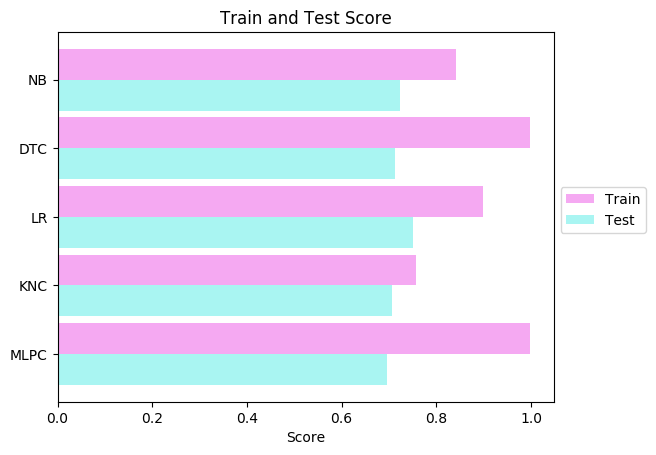

In [53]:
plot_comparation(ScoreTrain, ScoreTest)

<p  style="text-align: justify;"> 
    **(g)**  Utilice y explique las métricas que calcula la función classification report de la librería sklearn. En base
a las distintas métricas calculadas ¿Cuáles clasificadores son los que mejor se comportan?
</p>

<p  style="text-align: justify;"> 
    _Classification Report_ entrega las metricas principales de los clasificadores, es decir, un resumen de la precisión, el recall y el valor F.
</p>
<p  style="text-align: justify;"> 
    En este contexto se denomina precisión (denominado igualmente valor positivo predicho) como a la fracción de instancias recuperadas que son relevantes, mientras recall (denominado igualmente sensibilidad o exhaustividad) es la fracción de instancias relevantes que han sido recuperadas.
</p>

<img src="precisionrecall.png">

<p  style="text-align: justify;"> 
    El valor F (en ingles F-score) es la medida de precisión que tiene un test. Considera el valor de precisión $p$ y el de recall $r$ de test para calcular el valor.
</p>

<img src="F1.svg">

In [54]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print("___________________________________________________________________________")
    print("Training Accuracy: %f"%(acc_tr))
    print("Test Accuracy: %f"%(acc_test))
    print("Detailed Analysis Testing Results ...")
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))
    
score_the_model(nb_model, X_CV_train, y_train, X_CV_test, y_test)
score_the_model(DTC_model, X_CV_train, y_train, X_CV_test, y_test)
score_the_model(LR_model, X_CV_train, y_train, X_CV_test, y_test)
score_the_model(KNC_model, X_CV_train, y_train, X_CV_test, y_test)
score_the_model(MLPC_model, X_CV_train, y_train, X_CV_test, y_test)

___________________________________________________________________________
Training Accuracy: 0.840857
Test Accuracy: 0.724144
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.72      0.96      0.82      8069
          -       0.73      0.25      0.37      3931

avg / total       0.73      0.72      0.68     12000

___________________________________________________________________________
Training Accuracy: 0.997714
Test Accuracy: 0.712976
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       0.78      0.81      0.79      8069
          -       0.57      0.52      0.54      3931

avg / total       0.71      0.71      0.71     12000

___________________________________________________________________________
Training Accuracy: 0.898786
Test Accuracy: 0.750479
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

          +       

<p  style="text-align: justify;"> 
    **(h)**  [Opcional] Visualice las predicciones de algún modelo generativo (probabilístico) definido anteriormente, tomando un subconjunto aleatorio de tweets de pruebas y explorando las probabilidades que asigna el clasificador a cada clase.

</p>

In [55]:
import random
test_pred = LR_model.predict_proba(X_CV_test)
#print(test_pred)
random.seed(22)
spl = random.sample(range(len(test_pred)), 15)


print("Negative \t Positive \t Tweet")
for i in spl:
    print(test_pred[i],"\t",XX_test[i])


Negative 	 Positive 	 Tweet
[ 0.8055448  0.1944552] 	 may the forth be with you
[ 0.33714355  0.66285645] 	 alright @brainerdbaptist. let's do this
[ 0.81266317  0.18733683] 	 @Bunny90san ooo... No I believe they've all closed down, even the ones at the airport
[ 0.98235855  0.01764145] 	 never thought my daughter would want to borrow my clothes... even less that she would suggest that i borrow hers... luckily it didnt fit
[ 0.95731808  0.04268192] 	 Morning all.... Sorry for missing tweets yesterday @damohopo @Boddingtons How are you today?
[ 0.11032983  0.88967017] 	 @OfficalJonasBro just watched it on youtube and its hilarious. i laughed trough it.. seriously guys so funny.. greetings from Germany...
[ 0.47862292  0.52137708] 	 to all mothers out there... or even soon to be mothers &gt;8D happy mother's day y'all
[ 0.84367077  0.15632923] 	 upss..her name is writen like chesca.
[ 0.51470246  0.48529754] 	 @mitch_400iso Me too, she was adorable and you could tell the pressure got to 

<p  style="text-align: justify;"> 
    **(i)**  Ahora deberá extender el problema a las múltiples clases que tiene presente (las distintas emociones),
es decir, su trabajo será el de predecir una de las distintas emociones de cada _tweet_. Para esto utilice el
mismo pre-procesamiento realizado en el punto c) y las características generadas mediante las técnicas
en el punto e). Recuerde que tendrá que codificar las distintas clases como valores numéricos enteros.


</p>

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

df = pd.read_csv('./text_emotion.csv')
df.shape
np.random.seed(22)
msk = np.random.rand(len(df)) < 0.8
df.drop(['tweet_id','author'],axis=1,inplace=True)
df['content'] = df['content'].apply(preprocess)
df['content'] = df['content'].apply(lambda x: [item for item in x if item not in result])

#Sentimientos
#Neutral, Worry, Happiness, Sadness, Love, Surprise, Fun, Relief, Hate, Empty, Enthusiasm, Boredom, Anger

#Propuesta orden de sentimiento
#Happiness, Fun, Love, Surprise, Enthusiasm, Relief, Neutral, Empty,  Boredom, Worry, Sadness, Hate, Anger
#"Happiness", "Fun", "Love", "Surprise", "Enthusiasm", "Relief", "Neutral", "Empty", "Boredom", "Worry", "Sadness", "Hate", "Anger"

emotions = ["Happiness", "Love", "Fun", "Surprise", "Enthusiasm", "Relief", "Neutral", "Empty", "Boredom", "Worry", "Sadness", "Anger", "Hate"]

emotions =  [x.lower() for x in reversed(emotions)]

df['sentiment'] = df['sentiment'].apply(lambda x: emotions.index(x)-6)
df.head()

X = df['content'].values
y = df.sentiment.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

def fake(x):
    return x

#vectorizer = TfidfVectorizer(tokenizer=fake, preprocessor=fake, lowercase=False)

vectorizer = CountVectorizer(tokenizer=fake, preprocessor=fake, lowercase=False)

X_CV_train = vectorizer.fit_transform(X_train)
X_CV_test = vectorizer.transform(X_test)

<p  style="text-align: justify;"> 
    **(j)**  Utilice los clasificadores que son extendidos por defecto a múltiples clases para detectar emociones en
cada _tweet_, muestre sus desempeños a través del error de pruebas en un gráfico resumen.

</p>

In [57]:
ScoreTrain_M = {}
ScoreTest_M = {}

In [58]:
from sklearn.tree import DecisionTreeClassifier as DTC
DTC_model = DTC()
DTC_model.fit(X_CV_train, y_train)

ScoreTrain_M["DTC Train"] = DTC_model.score(X_CV_train, y_train)
ScoreTest_M["DTC Test"] = DTC_model.score(X_CV_test, y_test)

print("DTC Train score %f"%ScoreTrain_M["DTC Train"])
print("DTC Test score %f"%ScoreTest_M["DTC Test"])

DTC Train score 0.993643
DTC Test score 0.282083


In [59]:
from sklearn.neighbors import KNeighborsClassifier as KNC
KNC_model = KNC()
KNC_model.fit(X_CV_train, y_train)

ScoreTrain_M["KNC Train"] = KNC_model.score(X_CV_train, y_train)
ScoreTest_M["KNC Test"] = KNC_model.score(X_CV_test, y_test)

print("KNC Train score %f"%ScoreTrain_M["KNC Train"])
print("KNC Test score %f"%ScoreTest_M["KNC Test"])

KNC Train score 0.429893
KNC Test score 0.255167


In [60]:
from sklearn.neural_network import MLPClassifier as MLPC
MLPC_model = MLPC()
MLPC_model.fit(X_CV_train, y_train)

ScoreTrain_M["MLPC Train"] = MLPC_model.score(X_CV_train, y_train)
ScoreTest_M["MLPC Test"] = MLPC_model.score(X_CV_test, y_test)

print("MLPC Train score %f"%ScoreTrain_M["MLPC Train"])
print("MLPC Test score %f"%ScoreTest_M["MLPC Test"])

MLPC Train score 0.991786
MLPC Test score 0.256417


In [61]:
from sklearn.naive_bayes import MultinomialNB as MNB
MNB_model = MNB()
MNB_model.fit(X_CV_train, y_train)

ScoreTrain_M["MNB Train"] = MNB_model.score(X_CV_train, y_train)
ScoreTest_M["MNB Test"] = MNB_model.score(X_CV_test, y_test)

print("MNB Train score %f"%ScoreTrain_M["MNB Train"])
print("MNB Test score %f"%ScoreTest_M["MNB Test"])

MNB Train score 0.602857
MNB Test score 0.318083


<p  style="text-align: justify;"> 
    **(k)**  Utilice clasificadores binarios que pueden ser extendidos a través de otras técnicas, tal como One vs
One y One vs All/Rest [14]
</p>

- [14]  http://scikit-learn.org/stable/modules/classes.html#module-sklearn.multiclass

In [62]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier as ORC
ORC_model = ORC(MNB(), -1)
ORC_model.fit(X_CV_train, y_train)

ScoreTrain_M["ORC Train"] = ORC_model.score(X_CV_train, y_train)
ScoreTest_M["ORC Test"] = ORC_model.score(X_CV_test, y_test)

print("ORC Train score %f"%ScoreTrain_M["ORC Train"])
print("ORC Test score %f"%ScoreTest_M["ORC Test"])

ORC Train score 0.665643
ORC Test score 0.317917


In [63]:
from sklearn.multiclass import OneVsOneClassifier as OOC
OOC_model = OOC(MNB(), -1)
OOC_model.fit(X_CV_train, y_train)

ScoreTrain_M["OOC Train"] = OOC_model.score(X_CV_train, y_train)
ScoreTest_M["OOC Test"] = OOC_model.score(X_CV_test, y_test)

print("OOC Train score %f"%ScoreTrain_M["OOC Train"])
print("OOC Test score %f"%ScoreTest_M["OOC Test"])

OOC Train score 0.602857
OOC Test score 0.318083


<p  style="text-align: justify;"> 
    **(l)**  Para el caso de la Regresión Logística compare sus dos métodos para ser extendidos a múltiples clases.
Uno a través de One vs Rest y otro definiendo que la variable a predecir se distribuye Multinomial.

</p>

In [64]:
from sklearn.linear_model import LogisticRegression as LR
LR_model = LR(multi_class='ovr')
LR_model.fit(X_CV_train, y_train)

ScoreTrain_M["LR OvR Train"] = LR_model.score(X_CV_train, y_train)
ScoreTest_M["LR OvR Test"] = LR_model.score(X_CV_test, y_test)

print("LR Train score %f"%ScoreTrain_M["LR OvR Train"])
print("LR Test score %f"%ScoreTest_M["LR OvR Test"])

LR Train score 0.776607
LR Test score 0.342250


In [65]:
LR_model = LR(multi_class='multinomial', solver="newton-cg")
#Currently the ‘multinomial’ option is supported only by the ‘lbfgs’ and ‘newton-cg’ solvers.
LR_model.fit(X_CV_train, y_train)

ScoreTrain_M["LR Multi Train"] = LR_model.score(X_CV_train, y_train)
ScoreTest_M["LR Multi Test"] = LR_model.score(X_CV_test, y_test)

print("LR Train score %f"%ScoreTrain_M["LR Multi Train"])
print("LR Test score %f"%ScoreTest_M["LR Multi Test"])

LR Train score 0.814786
LR Test score 0.338750


<p  style="text-align: justify;"> 
    **(m)**  Compare los resultados entre los clasificadores extendidos por defecto y los binarios que son extendidos mediante otras técnicas, construya una tabla o gráfico resumen. Los clasificadores que mejor se comportan en el caso binario ¿Siguen teniendo ese desempeño en múltiples clases?


</p>

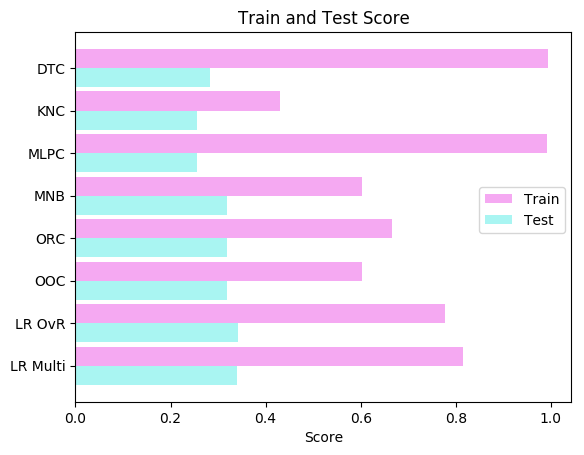

In [66]:
import matplotlib.pyplot as plt
def plot_comparation_M(ScoreTrain, ScoreTest):
    plt.rcdefaults()
    fig, ax = plt.subplots()
    location = np.arange(len(ScoreTrain))
    width = 0.45
    
    uno = ax.barh(location, ScoreTrain.values(),  width, align='center', color="#F5A9F2")
    dos = ax.barh(location + width, ScoreTest.values(), width, align='center', color="#A9F5F2")
    ax.set_yticks(location + width/2)
    ax.set_yticklabels(("DTC", "KNC", "MLPC", "MNB", "ORC", "OOC", "LR OvR", "LR Multi"))
    
    ax.set_xlabel('Score')
    ax.set_title('Train and Test Score')
    ax.legend((uno[0], dos[0]), ('Train', 'Test'), bbox_to_anchor=(1,0.6))
    #autolabel(uno)
    #autolabel(dos)
    ax.invert_yaxis()
    plt.show()
    return

plot_comparation_M(ScoreTrain_M, ScoreTest_M)